# Importing packages

In [1]:
# appending path
import sys
sys.path.append('../Deliverable_2/')
sys.path.append('../Deliverable_3/')

from DataLoader import TADataLoader
from DataAugmenter import DataAugmenter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henrique/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading original data

In [2]:
# load reviews data
loader = TADataLoader()
df_reviews = loader.load_reviews(drop_duplicates=True)

The original data we have collected is hihgly imbalanced. We can clearly see that the majority of reviews have a rating 5. 

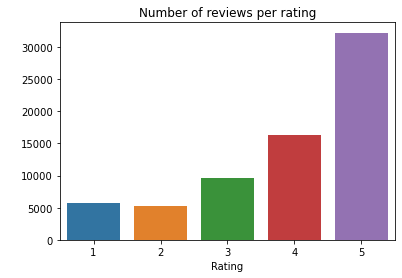

In [18]:
sns.countplot(x='review_rating', data=df_reviews)
plt.title('Number of reviews per rating')
plt.xlabel('Rating')
plt.ylabel(' ')
plt.show()


We proceeded to augment the data with lower representation in our dataset. We did so by substituting some of the words from these reviews by the closest similar word. In order to find these close words, we used a pre-trained word2vec model. 

In [24]:
augmenter = DataAugmenter([1, 2])
augmenter.augment()
augmented_df = augmenter.merge(df_reviews[['review_content', 'review_rating']])

The following reviews have been augmented: 1 2
[]


After the data augmentation, we see that the classes are more evenly distributed, but there is still a prevalence of reviews rated 5. We proceed, therefore, to downsample these reviews. 

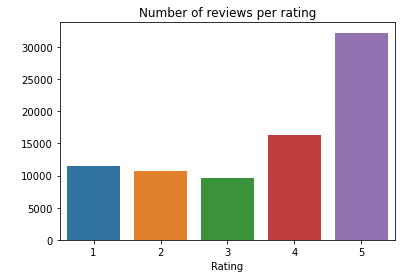

In [25]:
sns.countplot(x='review_rating', data=augmented_df)
plt.title('Number of reviews per rating')
plt.xlabel('Rating')
plt.ylabel(' ')
plt.show()

In [29]:
# downsampling 5s

five_reviews = augmented_df.loc[augmented_df['review_rating']==5]
five_sample = five_reviews.sample(int(len(five_reviews)/2))

# delete all fives from original df
filtered_reviews = augmented_df.loc[augmented_df['review_rating']!=5]
train_data = pd.concat([five_sample, filtered_reviews])

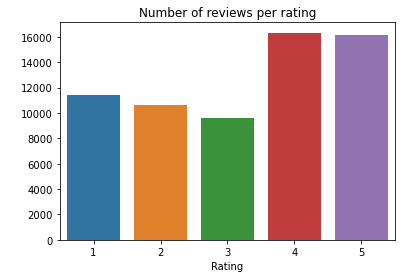

In [31]:
sns.countplot(x='review_rating', data=train_data)
plt.title('Number of reviews per rating')
plt.xlabel('Rating')
plt.ylabel(' ')
plt.show()

In [34]:
print(f'The training dataset has: {len(train_data)} reviews')

The training dataset has: 64094 reviews
